In [1]:
import seaborn as sns
import torch
import matplotlib.pyplot as plt
from models.realnvp import realnvp
from models.normalizing_flow import NormalizingFlow
from data.toy import ToyDataset

In [3]:
flows = realnvp(2, 10, hidden_dims=[32])

flow = NormalizingFlow(flows, lr=0.0003, d=2)


from data.m1q import M1QDataset

dataset = M1QDataset('../../datasets/Combined_GWTC_m1m2chieffz.npz', split='train')

(data,) = dataset[:]

data = data.mean(1)

sns.scatterplot(data[:, 0], data[:, 1])

In [14]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=1000,
                        shuffle=True, num_workers=0)


optimizer = torch.optim.Adam(flow.parameters(), lr=0.0003)

epochs = 1024

In [15]:
optimizer = torch.optim.Adam(flow.parameters(), lr=0.0003)

In [16]:
epochs = 1024

In [17]:
for epoch in range(epochs):
    for batch in dataloader:
        (x,) = batch
        log_prob = flow.log_prob(x)
        loss = -log_prob.mean()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print(epoch, loss.item())
        

KeyboardInterrupt: 

In [24]:
grid = torch.linspace(-3, 3, 1024)
mesh = torch.stack(torch.meshgrid(grid, grid, indexing='xy')).view(2, -1).permute(1, 0)

p = flow.log_prob(mesh).exp()

p = p.view(1024, 1024)

plt.imshow(p.detach().numpy())

In [53]:
from data.synthetic_m1m2 import SynetheticM1M2Dataset, load_data

In [65]:
data = data[:, 0]

/Users/druhe/Projects/gw/.venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

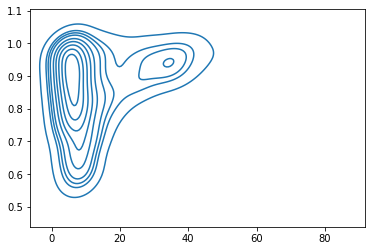

In [66]:
sns.kdeplot(data[:, 0], data[:, 1])

In [178]:
# dataset = SynetheticM1M2Dataset(None, 'train')
data = load_data(None)
data = torch.stack(data, dim=-1)
data = data[:, 0]
data[:, 0] = data[:, 0] / 128
flows = realnvp(2, 10, hidden_dims=[32])

flow = NormalizingFlow(flows, lr=0.03, d=2)


In [179]:
data[:, 0].min(), data[:, 0].max()

(tensor(0.0360), tensor(0.6546))

In [180]:
data[:, 1].min(), data[:, 1].max()

(tensor(0.5402), tensor(0.9999))

/Users/druhe/Projects/gw/.venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(-0.04089358823174616,
 0.7314984239804186,
 0.4362805257500796,
 1.2086725379622445)

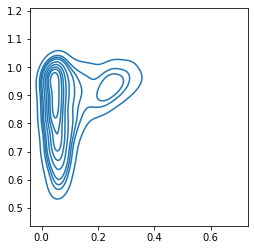

In [181]:
sns.kdeplot(data[:, 0], data[:, 1])
plt.axis('square')


In [182]:
from torch.utils.data import TensorDataset

In [183]:
dataset = TensorDataset(data)

In [184]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=1000,
                        shuffle=True, num_workers=0)


optimizer = torch.optim.Adam(flow.parameters(), lr=0.0001)

epochs = 2048

In [185]:
for epoch in range(epochs):
    for batch in dataloader:
        (x,) = batch
        log_prob = flow.log_prob(x)
        loss = -log_prob.mean()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print(epoch, loss.item())
        

0 1.5675846338272095
1 1.5669829845428467
2 1.5132079124450684
3 1.4098211526870728
4 1.3865312337875366
5 1.4110949039459229
6 1.3652520179748535
7 1.2692766189575195
8 1.3269506692886353
9 1.2463526725769043
10 1.1842775344848633
11 1.2360883951187134
12 1.1315590143203735
13 1.0816928148269653
14 1.125481367111206
15 1.052719235420227
16 1.024856448173523
17 1.0199276208877563
18 1.0218844413757324
19 1.0018417835235596
20 0.9334221482276917
21 0.8962818384170532
22 0.8450766801834106
23 0.8155063390731812
24 0.7603152990341187
25 0.8249467015266418
26 0.7840874195098877
27 0.7456626296043396
28 0.6749463677406311
29 0.7116946578025818
30 0.6291378140449524
31 0.6030694842338562
32 0.5751293897628784
33 0.5600682497024536
34 0.49427101016044617
35 0.5088653564453125
36 0.46336692571640015
37 0.5125933289527893
38 0.4386269450187683
39 0.40027886629104614
40 0.38022544980049133
41 0.3631015121936798
42 0.39333242177963257
43 0.2617270350456238
44 0.2653675973415375
45 0.2513673901557

351 -2.491053819656372
352 -2.9136805534362793
353 -2.9468042850494385
354 -2.7914938926696777
355 -2.361452102661133
356 -3.0315675735473633
357 -2.8842835426330566
358 -2.5888257026672363
359 -3.0175371170043945
360 -2.9732565879821777
361 -3.0363192558288574
362 -2.772001266479492
363 -2.791957139968872
364 -2.78279447555542
365 -2.5075111389160156
366 -3.040717840194702
367 -3.309704303741455
368 -3.008237361907959
369 -3.2570602893829346
370 -2.3226842880249023
371 -2.373488664627075
372 -3.2294373512268066
373 -3.089372158050537
374 -2.7423346042633057
375 -2.7670938968658447
376 -2.6278672218322754
377 -2.933636426925659
378 -3.034250020980835
379 -2.9846246242523193
380 -2.9215517044067383
381 -2.54593563079834
382 -2.9136481285095215
383 -3.3240740299224854
384 -2.8366572856903076
385 -2.916179656982422
386 -3.3508107662200928
387 -2.487151622772217
388 -2.674558162689209
389 -2.7480034828186035
390 -2.6184306144714355
391 -2.754868745803833
392 -3.245018243789673
393 -2.51722

702 -3.1117215156555176
703 -3.044515609741211
704 -3.8230104446411133
705 -3.5150675773620605
706 -2.4387266635894775
707 -3.2138657569885254
708 -3.68845534324646
709 -2.9259238243103027
710 -3.258099317550659
711 -2.9412925243377686
712 -3.363856315612793
713 -3.5736746788024902
714 -3.2445430755615234
715 -3.2519843578338623
716 -3.0348711013793945
717 -3.432596445083618
718 -3.265592336654663
719 -3.8490171432495117
720 -3.6266818046569824
721 -3.426345109939575
722 -3.4750893115997314
723 -2.9740149974823
724 -3.221015214920044
725 -3.1500487327575684
726 -2.463963031768799
727 -3.4545223712921143
728 -3.0134642124176025
729 -3.0587313175201416
730 -3.412909746170044
731 -2.772935390472412
732 -3.0900721549987793
733 -3.5501654148101807
734 -3.7175135612487793
735 -3.3044533729553223
736 -3.873037576675415
737 -3.1950693130493164
738 -3.4607772827148438
739 -2.7114622592926025
740 -2.9285993576049805
741 -1.9291622638702393
742 -3.33842134475708
743 -2.8366026878356934
744 -2.877

1054 -3.998995304107666
1055 -3.0851385593414307
1056 -3.257844924926758
1057 -3.654085159301758
1058 -2.9935030937194824
1059 -3.3467423915863037
1060 -2.9845504760742188
1061 -3.3946194648742676
1062 -3.596057653427124
1063 -3.8945698738098145
1064 -3.445932388305664
1065 -3.3308627605438232
1066 -2.8685734272003174
1067 -2.9984755516052246
1068 -3.90209698677063
1069 -3.9170289039611816
1070 -4.150184154510498
1071 -3.466545343399048
1072 -3.777174234390259
1073 -4.058472156524658
1074 -3.9267656803131104
1075 -3.267103672027588
1076 -3.9765381813049316
1077 -3.1856274604797363
1078 -2.8800206184387207
1079 -3.8530378341674805
1080 -2.464229106903076
1081 -3.5706636905670166
1082 -3.1325511932373047
1083 -3.3787455558776855
1084 -3.5809719562530518
1085 -3.6300573348999023
1086 -3.3066606521606445
1087 -3.1409707069396973
1088 -4.044730186462402
1089 -3.2255935668945312
1090 -3.0307960510253906
1091 -3.6016132831573486
1092 -2.439511775970459
1093 -3.31141996383667
1094 -3.647743701

1399 -3.432905912399292
1400 -3.7518503665924072
1401 -3.9660396575927734
1402 -3.219912052154541
1403 -3.5209150314331055
1404 -4.257035255432129
1405 -2.9508707523345947
1406 -3.278153419494629
1407 -3.2073097229003906
1408 -4.515912055969238
1409 -4.299421310424805
1410 -3.464989423751831
1411 -3.2549383640289307
1412 -3.2049741744995117
1413 -4.55589485168457
1414 -3.618927478790283
1415 -3.0179715156555176
1416 -4.4553608894348145
1417 -4.003703594207764
1418 -3.2366130352020264
1419 -3.84867000579834
1420 -3.876643180847168
1421 -3.069862127304077
1422 -3.5984458923339844
1423 -3.444180727005005
1424 -3.5095365047454834
1425 -2.8503544330596924
1426 -3.521636486053467
1427 -3.487006187438965
1428 -3.151959180831909
1429 -3.3038182258605957
1430 -3.0945308208465576
1431 -3.803842067718506
1432 -3.549899101257324
1433 -3.6126770973205566
1434 -3.2962076663970947
1435 -3.5300707817077637
1436 -3.915320873260498
1437 -3.857635021209717
1438 -3.3532536029815674
1439 -3.724649429321289

1737 -3.48769474029541
1738 -4.006834983825684
1739 -3.7908854484558105
1740 -3.425755739212036
1741 -3.0738685131073
1742 -4.292701244354248
1743 -2.862154245376587
1744 -3.561678886413574
1745 -2.8404946327209473
1746 -3.3877744674682617
1747 -2.880066394805908
1748 -3.4920308589935303
1749 -4.12754487991333
1750 -4.712493419647217
1751 -4.332992076873779
1752 -2.9190549850463867
1753 -3.8973019123077393
1754 -2.811706066131592
1755 -3.1984763145446777
1756 -4.2394537925720215
1757 -4.724476337432861
1758 -3.190019369125366
1759 -3.724066734313965
1760 -2.7408852577209473
1761 -2.7069380283355713
1762 -2.825282573699951
1763 -4.108999252319336
1764 -4.249982833862305
1765 -3.9356744289398193
1766 -3.3365018367767334
1767 -2.962183713912964
1768 -3.105109214782715
1769 -2.6502323150634766
1770 -3.822499990463257
1771 -3.340416669845581
1772 -3.121171712875366
1773 -3.6402676105499268
1774 -4.4577107429504395
1775 -4.452587604522705
1776 -3.4630022048950195
1777 -3.999901533126831
1778

In [186]:
data.min()

tensor(0.0360)

In [187]:
data.max()

tensor(0.9999)

In [188]:
data.min(dim=0), data.max(dim=0)

(torch.return_types.min(
 values=tensor([0.0360, 0.5402]),
 indices=tensor([688, 973])),
 torch.return_types.max(
 values=tensor([0.6546, 0.9999]),
 indices=tensor([466, 300])))

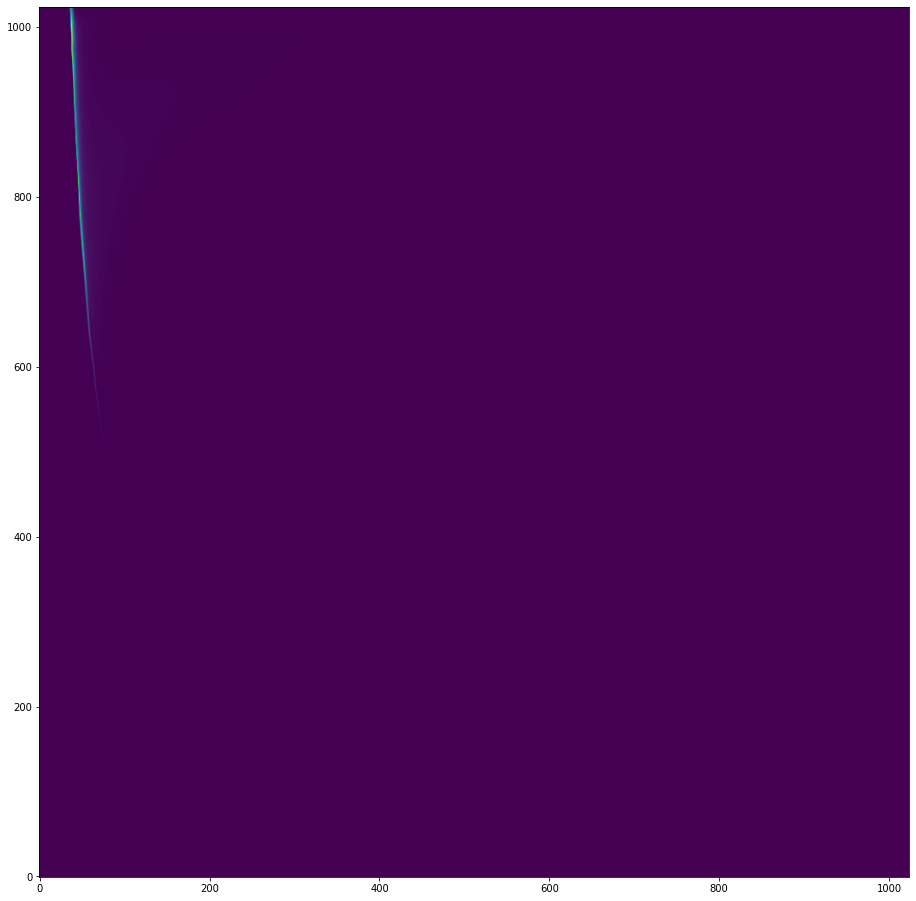

In [189]:

plt.figure(figsize=(16, 16))
# x = torch.linspace(0.5437, 0.999, 1024)
# y = torch.linspace(4.59, 80.84, 1024)

x = torch.linspace(0, 1, 1024)
y = torch.linspace(0, 1, 1024)

# x = torch.linspace(0, 4, 1024)


mesh = torch.stack(torch.meshgrid(y, x, indexing='xy')).view(2, -1).permute(1, 0)

p = flow.log_prob(mesh).exp()

p = p.view(1024, 1024)

plt.imshow(p.detach().numpy(), origin='lower')

In [190]:
from pyro import distributions as dist

In [191]:
flow_dist = dist.TransformedDistribution(flow.base_dist, flow.flows)

In [195]:
samples = flow_dist.sample((1024,))

/Users/druhe/Projects/gw/.venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

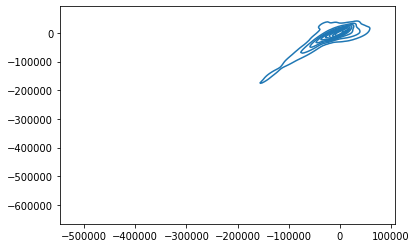

In [196]:
sns.kdeplot(samples[:, 0], samples[:, 1])